In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
pyo.init_notebook_mode()
import warnings
warnings.filterwarnings("ignore")

# Data Manipulation

## Crop statistics FAO dataset

Filter for avocados

In [2]:
df_crops = pd.read_csv('Crops_AllData_Normalized.csv', encoding = 'latin-1')
df_crops.head()

Area Code         Area  Item Code                 Item  Element Code  \
0          2  Afghanistan        221  Almonds, with shell          5312   
1          2  Afghanistan        221  Almonds, with shell          5312   
2          2  Afghanistan        221  Almonds, with shell          5312   
3          2  Afghanistan        221  Almonds, with shell          5312   
4          2  Afghanistan        221  Almonds, with shell          5312   

          Element  Year Code  Year Unit   Value Flag  
0  Area harvested       1975  1975   ha     0.0    F  
1  Area harvested       1976  1976   ha  5900.0    F  
2  Area harvested       1977  1977   ha  6000.0    F  
3  Area harvested       1978  1978   ha  6000.0    F  
4  Area harvested       1979  1979   ha  6000.0    F

In [3]:
df_avocados_yield = df_crops[(df_crops['Item'] == 'Avocados') & (df_crops['Element'] == 'Yield')]
# df_avocados_area = df_crops[(df_crops['Item'] == 'Avocados') & (df_crops['Element'] == 'Area harvested')]

In [4]:
df_avocados_yield = df_avocados_yield.dropna()
df_avocados_yield = df_avocados_yield.drop_duplicates()

In [5]:
avocados = df_avocados_yield.drop(columns = ['Area Code', 'Item Code', 'Item', 'Element Code', 
                                            'Element', 'Year Code', 'Unit', 'Flag'])
# avocados = avocados.pivot(index = 'Year', columns = 'Area', values = 'Value')
avocados = avocados.rename(columns={'Value':'Yield'})
avocados.head()

Area  Year    Yield
45696  Argentina  1985  57778.0
45697  Argentina  1986  60000.0
45698  Argentina  1987  60606.0
45699  Argentina  1988  60606.0
45700  Argentina  1989  60606.0

## FAOSTAT Temperature Change Dataset

Filter for annual temperature change

In [6]:
df_temperature = pd.read_csv('FAOSTAT_data_1-10-2022.csv')
df_temperature = df_temperature.rename(columns={'Value':'temp_change'})
df_temperature.head()

Domain Code              Domain  Area Code (FAO)         Area  Element Code  \
0          ET  Temperature change                2  Afghanistan          7271   
1          ET  Temperature change                2  Afghanistan          7271   
2          ET  Temperature change                2  Afghanistan          7271   
3          ET  Temperature change                2  Afghanistan          7271   
4          ET  Temperature change                2  Afghanistan          7271   

              Element  Months Code   Months  Year Code  Year Unit  \
0  Temperature change         7001  January       1961  1961   ?C   
1  Temperature change         7001  January       1962  1962   ?C   
2  Temperature change         7001  January       1963  1963   ?C   
3  Temperature change         7001  January       1964  1964   ?C   
4  Temperature change         7001  January       1965  1965   ?C   

   temp_change Flag Flag Description  
0        0.746   Fc  Calculated data  
1        0.009   Fc  Calculated data  
2        2.695   Fc  Calculated data  
3       -5.277   Fc  Calculated data  
4        1.827   Fc  Calculated data

In [7]:
df_temp = df_temperature.drop(columns=['Domain Code', 'Domain', 'Area Code (FAO)', 'Months Code', 'Year Code',
                                       'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description'])

df_temp = df_temp.dropna()
df_temp = df_temp.drop_duplicates()
df_temp

Area               Months  Year  temp_change
0       Afghanistan              January  1961        0.746
1       Afghanistan              January  1962        0.009
2       Afghanistan              January  1963        2.695
3       Afghanistan              January  1964       -5.277
4       Afghanistan              January  1965        1.827
...             ...                  ...   ...          ...
229920     Zimbabwe  Meteorological year  2016        1.470
229921     Zimbabwe  Meteorological year  2017        0.443
229922     Zimbabwe  Meteorological year  2018        0.747
229923     Zimbabwe  Meteorological year  2019        1.359
229924     Zimbabwe  Meteorological year  2020        0.820

[222012 rows x 4 columns]

In [9]:
df_temp_year = df_temp[df_temp['Months'] == 'Meteorological year']
df_temp_year = df_temp_year.drop(columns=['Months'])
df_temp_year.head()

Area  Year  temp_change
960  Afghanistan  1961       -0.121
961  Afghanistan  1962       -0.171
962  Afghanistan  1963        0.841
963  Afghanistan  1964       -0.779
964  Afghanistan  1965       -0.254

## FAOSTAT Fertilizers by Nutrients Dataset

Combine all fertilizers and calculate average annual use

In [10]:
df_fertilizer = pd.read_csv('Inputs_FertilizersNutrient_E_All_Data_NOFLAG.csv', encoding = 'latin-1')
df_fertilizer= df_fertilizer[df_fertilizer['Element'] == 'Agricultural Use']

df_fertilizer.head()

Area Code Area Code (M49)         Area  Item Code  \
3           2            '004  Afghanistan       3102   
7           2            '004  Afghanistan       3103   
11          2            '004  Afghanistan       3104   
15          3            '008      Albania       3102   
19          3            '008      Albania       3103   

                               Item  Element Code           Element    Unit  \
3       Nutrient nitrogen N (total)          5157  Agricultural Use  tonnes   
7   Nutrient phosphate P2O5 (total)          5157  Agricultural Use  tonnes   
11      Nutrient potash K2O (total)          5157  Agricultural Use  tonnes   
15      Nutrient nitrogen N (total)          5157  Agricultural Use  tonnes   
19  Nutrient phosphate P2O5 (total)          5157  Agricultural Use  tonnes   

     Y1961   Y1962  ...     Y2011     Y2012     Y2013     Y2014     Y2015  \
3   1000.0  1000.0  ...  22970.63  17065.25  34903.79  73872.84  92515.97   
7    100.0   100.0  ...   6845.57   1261.44   3020.03   5121.35  10886.87   
11     NaN     NaN  ...      0.00    196.78     88.11      6.67     61.84   
15  3187.0  2000.0  ...  36892.70  34944.13  30711.91  30711.76  36803.92   
19  2433.0  2500.0  ...  23341.22  22165.38  22906.47  22906.54  28725.33   

       Y2016      Y2017     Y2018     Y2019     Y2020  
3   96670.85  140775.85  46613.50  59702.92  43141.63  
7    8991.27   16656.69  12319.04  25761.88  24956.38  
11     71.73      31.48      0.62      0.00    127.77  
15  42896.08   39184.92  24769.07  38329.56  32578.70  
19  34544.12   21263.69  13358.07  15087.82  22898.59  

[5 rows x 68 columns]

In [11]:
df_fert = df_fertilizer.drop(columns=['Area Code', 'Area Code (M49)', 'Item Code',
                                       'Element Code', 'Element', 'Unit', 'Item'])


df_fert = df_fert.groupby('Area').mean().reset_index()
df_fert = df_fert.rename(columns={x:x[1:] for x in df_fert.columns if 'Y' in x})

df_fert = df_fert.melt(id_vars=['Area'], value_vars = [str(n) for n in range(1961, 2020 + 1)], 
                       var_name= 'Year', value_name= 'avg_fert')
df_fert = df_fert.sort_values(['Area', 'Year'])
df_fert = df_fert.fillna(0)
df_fert['Year'] = df_fert['Year'].astype(int)

df_fert

Area  Year      avg_fert
0      Afghanistan  1961    550.000000
209    Afghanistan  1962    550.000000
418    Afghanistan  1963    550.000000
627    Afghanistan  1964    550.000000
836    Afghanistan  1965    550.000000
...            ...   ...           ...
11703     Zimbabwe  2016  43433.333333
11912     Zimbabwe  2017  48800.000000
12121     Zimbabwe  2018  44266.666667
12330     Zimbabwe  2019  44266.666667
12539     Zimbabwe  2020  44266.666667

[12540 rows x 3 columns]

## FAOSTAT Emissions Dataset

Filter for CH4 (methane)

In [12]:
df_emission = pd.read_csv('Emissions_Totals_E_All_Data_(Normalized).csv', encoding = 'latin-1', low_memory = False)
df_ch4 = df_emission[df_emission['Element'] == 'Emissions (CH4)']
df_ch4 = df_ch4.drop(columns=['Area Code', 'Area Code (M49)', 'Item Code', 'Item',
                                       'Element Code', 'Element', 'Unit', 'Flag', 'Note'])

df_ch4 = df_ch4.groupby(['Area', 'Year'])['Value'].sum().reset_index()
df_ch4 = df_ch4.rename(columns={'Value':'CH4'})
df_ch4

Area  Year        CH4
0      Afghanistan  1961   571.5586
1      Afghanistan  1962   581.7342
2      Afghanistan  1963   604.0564
3      Afghanistan  1964   613.8140
4      Afghanistan  1965   627.8378
...            ...   ...        ...
15166     Zimbabwe  2018  2821.0779
15167     Zimbabwe  2019  2846.4932
15168     Zimbabwe  2020  2686.0864
15169     Zimbabwe  2030  2609.5168
15170     Zimbabwe  2050  3442.7856

[15171 rows x 3 columns]

## CO2 Dataset

Filter for CO2 (carbon dioxide)

In [13]:
df_co2 = pd.read_csv("CO2 emission by countries.csv", encoding = "ISO-8859-1")

df_co2.rename(columns = {"CO2 emission (Tons)":"co2_emission_tons", "Density(km2)":"CO2_density",
                         "% of World":"percentage_of_world", "Country":"country"}, inplace = True)

In [14]:
df_co2["CO2_density"] = df_co2["CO2_density"].str.replace("/km²", "", regex=True)
df_co2["CO2_density"] = df_co2["CO2_density"].str.replace(',','.', regex=True)
df_co2["CO2_density"] = df_co2["CO2_density"].astype(float)

df_co2 = df_co2.drop(columns=['Code', 'Calling Code', 'co2_emission_tons', 'Population(2022)',
                                       'percentage_of_world', 'Area'])

df_co2 = df_co2.replace({'Congo': 'Democratic Republic of the Congo'})

df_co2.head()

country  Year  CO2_density
0  Afghanistan  1750         63.0
1  Afghanistan  1751         63.0
2  Afghanistan  1752         63.0
3  Afghanistan  1753         63.0
4  Afghanistan  1754         63.0

## Merge Datasets

In [15]:
df_merge = avocados.merge(df_temp_year, on=['Area', 'Year']).merge(
    df_fert, on=['Area', 'Year']).merge(df_ch4, on=['Area', 'Year'])

df_merge = df_merge.rename(columns={'Area':'country'})
df_main = pd.merge(df_merge, df_co2, on=['country', 'Year'])
df_main = df_main.replace({'Bolivia (Plurinational State of)': 'Bolivia', 
                           'Venezuela (Bolivarian Republic of)':'Venezuela', 
                           'United States of America':'United States',
                           'China, mainland':'China'})
df_main = df_main.dropna()

df_main

country  Year    Yield  temp_change      avg_fert        CH4  \
0     Argentina  1985  57778.0        0.245  54200.000000  6810.4064   
1     Argentina  1986  60000.0        0.405  50381.333333  6649.3065   
2     Argentina  1987  60606.0        0.391  55966.666667  6454.3768   
3     Argentina  1988  60606.0       -0.249  54166.666667  6591.4282   
4     Argentina  1989  60606.0        0.565  51033.333333  6639.3964   
...         ...   ...      ...          ...           ...        ...   
2268   Zimbabwe  2015  58020.0        1.226  26200.000000  2895.5529   
2269   Zimbabwe  2016  58065.0        1.470  43433.333333  2704.1883   
2270   Zimbabwe  2017  58027.0        0.443  48800.000000  3114.6840   
2271   Zimbabwe  2018  58242.0        0.747  44266.666667  2821.0779   
2272   Zimbabwe  2019  58003.0        1.359  44266.666667  2846.4932   

      CO2_density  
0            16.0  
1            16.0  
2            16.0  
3            16.0  
4            16.0  
...           ...  
2268         42.0  
2269         42.0  
2270         42.0  
2271         42.0  
2272         42.0  

[2126 rows x 7 columns]

# Data Visualization

## Average Annual Temperature Change by Country 

In [16]:
fig = px.line(df_main, x = 'Year', y = 'temp_change', color = 'country')
fig.show()

## Total Annual Avocado Yield by Country

In [17]:
fig = px.line(df_main, x = 'Year', y = 'Yield', color = 'country')
fig.show()

## Global Annual Average Temperature Change and Total Avocado Yield

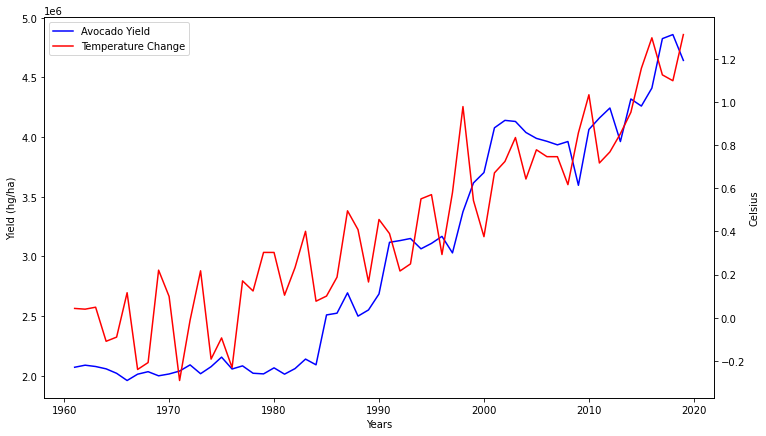

In [18]:
total_yield = df_main.groupby(['Year'])['Yield'].sum().reset_index()
avg_temp = df_main.groupby(['Year'])['temp_change'].mean().reset_index()

fig3, ax_total = plt.subplots()
ax_total.set_xlabel('Years')
ax_total.set_ylabel('Yield (hg/ha)')
plot1 = ax_total.plot(total_yield.Year, total_yield.Yield, color = 'blue', label = 'Avocado Yield')

ax_avg = ax_total.twinx()
plot2 = ax_avg.plot(avg_temp.Year, avg_temp.temp_change, color = 'red', label = 'Temperature Change')
ax_avg.set_ylabel('Celsius')

lines, labels = ax_total.get_legend_handles_labels()
lines2, labels2 = ax_avg.get_legend_handles_labels()
ax_total.legend(lines + lines2, labels + labels2)
figure = plt.gcf()
figure.set_size_inches(12, 7)
plt.show()

## Worldwide total avocado yield from 1961 to 2019

In [19]:
df_country = px.data.gapminder()
df_country_code = df_country[['iso_alpha', 'country']]
df_main_cc = df_main.merge(df_country_code, on = ['country'])
df_main_cc.sort_values('Year')
global_yield = df_main_cc.groupby(['country','Year', 'iso_alpha'])['Yield'].sum().reset_index().sort_values('Year')

fig = px.scatter_geo(global_yield, locations = 'iso_alpha', color = 'Yield', color_continuous_scale = 'plasma', 
                     size = 'Yield', size_max = 30, hover_name = 'country', hover_data = dict(iso_alpha=None),
                     animation_frame = 'Year', projection = 'natural earth', 
                     range_color = [global_yield.Yield.min(), global_yield.Yield.max()], 
                     labels = dict(Yield = 'Yield (hg/ha)', Year = 'Year'))

fig.update_layout(    
    title = 'Worldwide total avocado yield from 1961 to 2019',
    title_x = 0.47, title_y = 0.95,
    title_xanchor = 'center', title_yanchor = 'top',
    dragmode = False, width = 1000, height = 600)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 250
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 80

fig.show()

## Global Temperature Change by Countries from 1961 to 2019

In [20]:
fig = px.choropleth(df_main_cc, locations = 'iso_alpha', animation_frame = 'Year', color = 'temp_change', 
                    color_continuous_scale = 'balance', range_color = [-2, 2.5], hover_name = 'country', 
                    hover_data = dict(iso_alpha = None), labels = dict(Year = 'Year', 
                                                                     temp_change = 'Temperature Change (°C)'))

fig.update_layout(title = 'Global Temperature Change by Countries from 1961 to 2019',
                  title_x = 0.45, title_y = 0.95, title_xanchor = 'center', title_yanchor = 'top',
                  dragmode = False, width = 1000, height = 600)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 250
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 80

fig.show()

# Data Analysis

## Exploratory Data Analysis

### Avocado Yield Distribution

<AxesSubplot:ylabel='Frequency'>

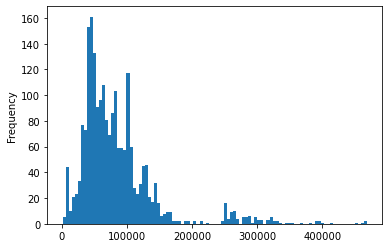

In [21]:
# distribution of avocado yield (column = 'Value')
df_main['Yield'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

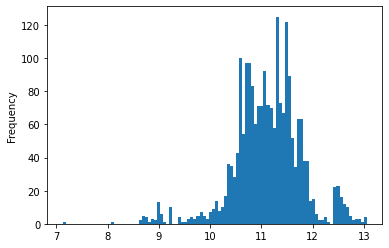

In [22]:
# log-transformed Yield
df_main['ln_yield'] = np.log(df_main['Yield'])
df_main['ln_yield'].plot(kind='hist', bins=100)

### Temperature Change Distribution

<AxesSubplot:ylabel='Frequency'>

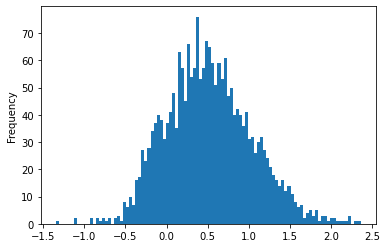

In [53]:
df_main['temp_change'].plot(kind='hist', bins=100)

### Fertilizer Use Distribution

<AxesSubplot:ylabel='Frequency'>

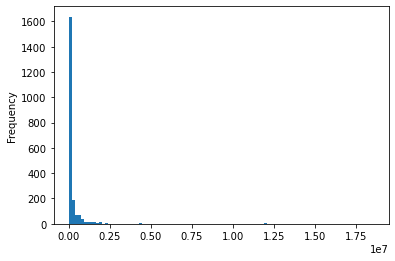

In [24]:
df_main['avg_fert'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

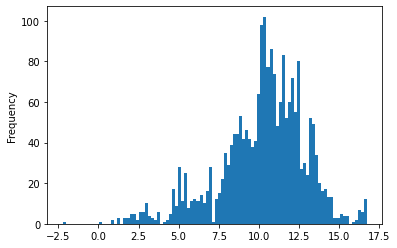

In [25]:
df_main['avg_fert'] = df_main['avg_fert'].replace(to_replace=0, method='ffill')
df_main['ln_fert'] = np.log(df_main['avg_fert'])
df_main['ln_fert'].plot(kind='hist', bins=100)

### Methane Distribution

<AxesSubplot:ylabel='Frequency'>

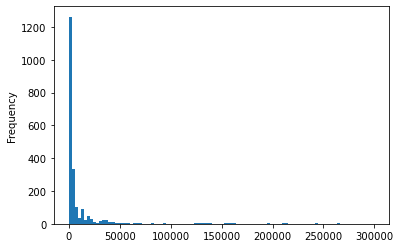

In [26]:
df_main['CH4'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

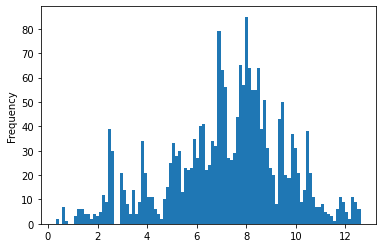

In [27]:
df_main['ln_ch4'] = np.log(df_main['CH4'])
df_main['ln_ch4'].plot(kind='hist', bins=100)

### CO2 Density Distribution

<AxesSubplot:ylabel='Frequency'>

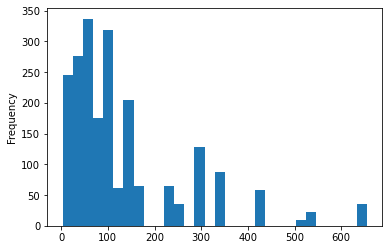

In [28]:
df_main['CO2_density'].plot(kind='hist', bins=30)

<AxesSubplot:ylabel='Frequency'>

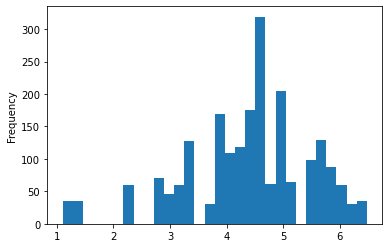

In [29]:
df_main['ln_co2'] = np.log(df_main['CO2_density'])
df_main['ln_co2'].plot(kind='hist', bins=30)

### Correlation Matrix

In [52]:
df_main_corr = df_main.corr()

fig = go.Figure()
fig.add_trace(go.Heatmap(x = df_main_corr.columns, y = df_main_corr.index, z = np.array(df_main_corr), 
                         text=df_main_corr.values, texttemplate='%{text:.2f}'))
fig.update_layout(title = 'Correlation Matrix',
                  title_x = 0.5, title_y = 0.9, title_xanchor = 'center', title_yanchor = 'top',
                  dragmode = False, width = 1000, height = 600)
fig.show()

## Regression

### Linear Regression

Regression with just average temperature change and log yield

In [31]:
lr_result = smf.ols('ln_yield ~ temp_change', data = df_main).fit()
lr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_yield   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     36.18
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           2.11e-09
Time:                        16:31:54   Log-Likelihood:                -2134.2
No. Observations:                2126   AIC:                             4272.
Df Residuals:                    2124   BIC:                             4284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.0334      0.020    546.177      0.000      10.994      11.073
temp_change     0.1661      0.028      6.015      0.000       0.112       0.220
==============================================================================
Omnibus:                      180.843   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.738
Skew:                          -0.461   Prob(JB):                    1.36e-108
Kurtosis:                       5.181   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

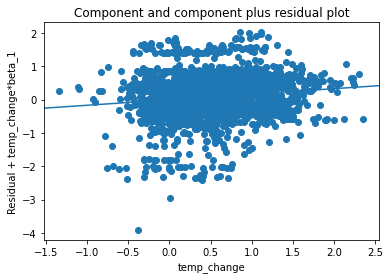

In [32]:
fig = sm.graphics.plot_ccpr(lr_result, 'temp_change')

Low R-squared of 1.7%

### Multivariate Regression

Regression including other control variables (log fertilizer use, log methane, and log carbon dioxide density)

In [33]:
mlr_result = smf.ols('ln_yield ~ temp_change + ln_fert + ln_ch4 + ln_co2', data = df_main).fit()
mlr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_yield   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     49.90
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           3.48e-40
Time:                        16:31:54   Log-Likelihood:                -2056.5
No. Observations:                2126   AIC:                             4123.
Df Residuals:                    2121   BIC:                             4151.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.3769      0.086    120.676      0.000      10.208      10.546
temp_change     0.0652      0.029      2.257      0.024       0.009       0.122
ln_fert        -0.0617      0.008     -7.302      0.000      -0.078      -0.045
ln_ch4          0.0927      0.010      8.840      0.000       0.072       0.113
ln_co2          0.1533      0.013     11.426      0.000       0.127       0.180
==============================================================================
Omnibus:                      116.314   Durbin-Watson:                   0.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.438
Skew:                          -0.262   Prob(JB):                     3.54e-71
Kurtosis:                       4.841   Cond. No.                         85.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

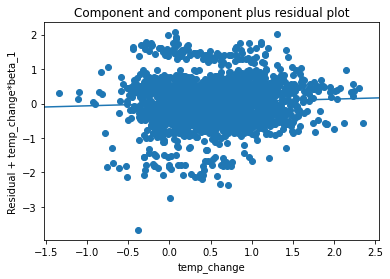

In [34]:
fig = sm.graphics.plot_ccpr(mlr_result, 'temp_change')

Adding more control variables improved adjusted R-squared to 8.4%

### Regression with Countries as Dummy Variable

In [35]:
countries = df_main['country'].unique().tolist()

reg_dict, reg_list = {}, []
country_list = [str(name) for name in countries]
for country in countries:
    country_data = df_main[df_main['country'] == str(country)]
    model = smf.ols('ln_yield ~ temp_change + ln_fert + ln_ch4 + ln_co2', data=country_data).fit()
    reg_list.append(model)
# print(reg_list[0].summary())
for i in range(len(country_list)):
    reg_dict[country_list[i]] = reg_list[i]
# print(reg_dict['Argentina'].summary())

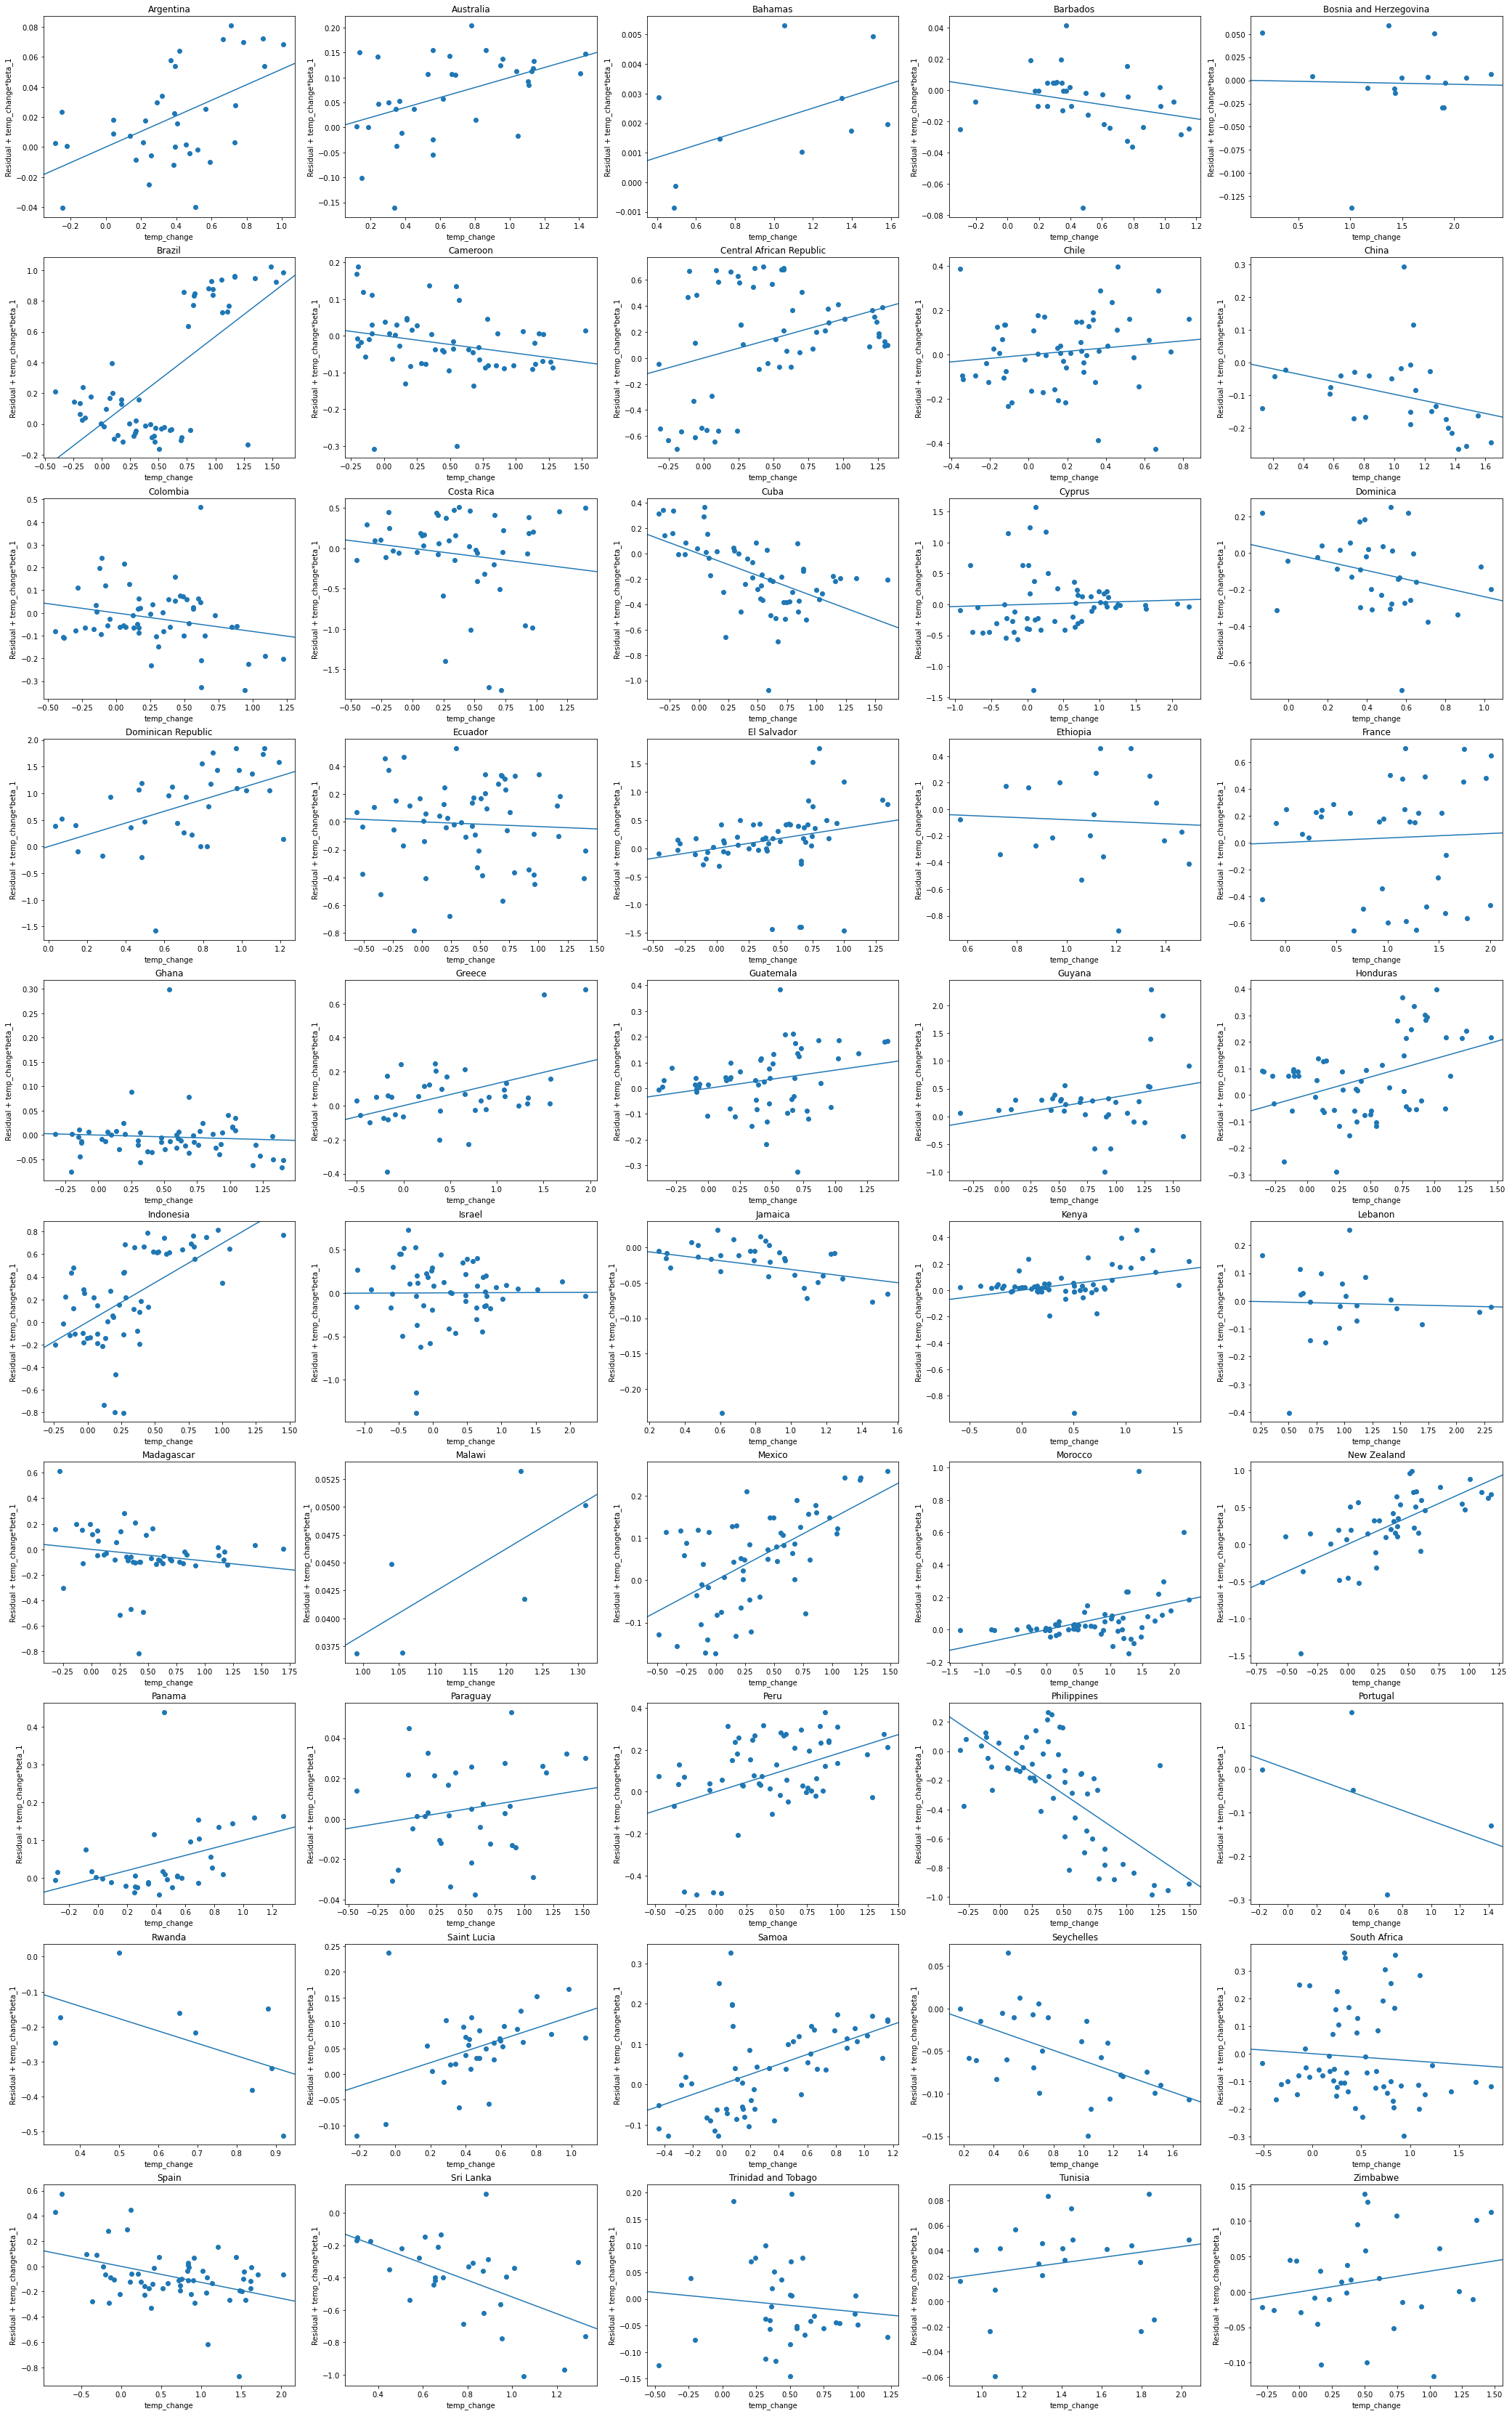

In [36]:
fig, ax = plt.subplots(10, 5, figsize = (36, 60))
row_counter, column_counter = 0, 0
for country in country_list:
    if column_counter < 4:
        sm.graphics.plot_ccpr(reg_dict[str(country)], 'temp_change', ax[row_counter, column_counter])
        ax[row_counter, column_counter].set_title(str(country))
        column_counter += 1
    else:
        sm.graphics.plot_ccpr(reg_dict[str(country)], 'temp_change', ax[row_counter, column_counter])
        ax[row_counter, column_counter].set_title(str(country))
        row_counter += 1
        column_counter = 0
# for i in range(2, 5):
#     fig.delaxes(ax[13][i]) 
# plt.savefig('regmap.jpg', dpi = 200)
#     print(row_counter, column_counter)

In [37]:
print(reg_dict['Mexico'].summary())

                            OLS Regression Results                            
Dep. Variable:               ln_yield   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     38.70
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           1.39e-13
Time:                        16:31:59   Log-Likelihood:                 59.371
No. Observations:                  59   AIC:                            -110.7
Df Residuals:                      55   BIC:                            -102.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7830      0.016     49.080      

Now by regressing each individual country, countries with high R-squared can be identified (e.g. Mexico with 66.1% adjusted R-squared)

# Conclusion

## Top 10 countries with high adjusted R-squared and low p-value

In [38]:
rsquare_list, adj_r_list, pvalue_list = ([] for i in range(3))
for country in countries:
    rsquare_list.append(reg_dict[str(country)].rsquared)
    adj_r_list.append(reg_dict[str(country)].rsquared_adj)
    pvalue_list.append(round(reg_dict[str(country)].pvalues.loc['temp_change'], 4))
    
df_country_stats = pd.DataFrame({'country': countries, 'r_square': rsquare_list,
                                 'adj_r_square': adj_r_list, 'p_value': pvalue_list})

In [39]:
country_high = df_country_stats[(df_country_stats['p_value'] < 0.05) 
                                   & (df_country_stats['r_square'] > 0.3)]
top10countries = country_high.sort_values('r_square', ascending = False).head(10)
top10countries

country  r_square  adj_r_square  p_value
34  New Zealand  0.902943      0.896010   0.0000
1     Australia  0.746909      0.722416   0.0155
12         Cuba  0.738776      0.724527   0.0009
0     Argentina  0.720187      0.693109   0.0030
32       Mexico  0.678575      0.661042   0.0007
41  Saint Lucia  0.660821      0.627997   0.0293
25    Indonesia  0.636285      0.616446   0.0009
33      Morocco  0.517883      0.491586   0.0373
35       Panama  0.502034      0.453844   0.0481
46    Sri Lanka  0.448637      0.382474   0.0050

## Top 10 avocado yielding countries

In [40]:
df_main.groupby('country')['Yield'].sum().sort_values(ascending = False).reset_index().head(10)

country       Yield
0               Samoa  15777857.0
1                Cuba  10736542.0
2               Kenya   8346142.0
3  Dominican Republic   8075604.0
4         El Salvador   6253056.0
5              Brazil   6138471.0
6              Mexico   5723626.0
7           Guatemala   5684889.0
8             Morocco   5652491.0
9                Peru   5639749.0

## Regression Model's Top 10 Predicting Countries Chart

In [41]:
top10countries_cc = top10countries.merge(df_country_code, on = ['country'])

In [42]:
fig = px.choropleth(top10countries_cc, locations = 'iso_alpha',
                    color = 'r_square', 
                    hover_name = 'country', 
                    color_continuous_scale = px.colors.sequential.Plasma)
fig.update_layout(title = 'Regression Model Top 10 Predicting Countries',
                  title_x = 0.50, title_y = 0.9, title_xanchor = 'center', title_yanchor = 'top',
                  dragmode = False, width = 1000, height = 600)
fig.show()